Importing the necessary libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df_uber=pd.read_csv(r"C:\Users\User\Desktop\pydata\uber dataset.csv")

Quick data inspection

In [ ]:

df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [47]:
df_uber.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,HOUR,MINUTE
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,CID1982111,eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,12,29
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,CID4604802,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,18,1
2,2024-08-23,8:56:10,"""CNR8494506""",Completed,CID9202816,Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card,8,56
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,CID2610914,Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI,17,17
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,CID9933542,Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI,22,8


Data cleaning

In [ ]:
#conversion of date/time to datetime type
df_uber['Date'] = pd.to_datetime(df_uber['Date'], errors='coerce')

In [ ]:
#-Grouped/categorical time analysis
df_uber['HOUR'] = pd.to_datetime(df_uber['Time'], format='%H:%M:%S', errors='coerce').dt.hour
df_uber['MINUTE'] = pd.to_datetime(df_uber['Time'], format='%H:%M:%S', errors='coerce').dt.minute
print("First 5 rows with corrected extraction:")
print(df_uber[['Time', 'HOUR', 'MINUTE']].head())

First 5 rows with corrected extraction:
       Time  HOUR  MINUTE
0  12:29:38    12      29
1  18:01:39    18       1
2   8:56:10     8      56
3  17:17:25    17      17
4  22:08:00    22       8


In [41]:
# Clean column names by stripping spaces
df_uber.columns = df_uber.columns.str.strip()

#Clean 'Payment Method' column
df_uber['Payment Method'] = df_uber['Payment Method'].astype(str).str.strip()

In [ ]:
#cleaning customer ID column
df_uber['Customer ID'] = df_uber['Customer ID'].astype(str).str.strip('\"').str.strip() 
unique_customers = df_uber['Customer ID'].nunique()
unique_customers

148788

In [52]:
#cleaning of the pick up location column
df_uber['Pickup Location'] = df_uber['Pickup Location'].astype(str).str.strip()
df_uber['Drop Location'] = df_uber['Drop Location'].astype(str).str.strip()

Univariate Analysis

In [43]:
#no of transactions
total_transactions = df_uber.shape[0]
total_transactions

150000

In [48]:
#calcution of mean,min,max
rating_columns = ['Driver Ratings', 'Customer Rating']
agg_functions = ['mean', 'min', 'max']
rating_stats = df_uber[rating_columns].agg(agg_functions)
print(rating_stats)

      Driver Ratings  Customer Rating
mean        4.230992         4.404584
min         3.000000         3.000000
max         5.000000         5.000000


In [ ]:
#span of data

data_start = df_uber['Date'].min().strftime('%B %d, %Y')
data_end = df_uber['Date'].max().strftime('%B %d, %Y')
time_span_days = (df_uber['Date'].max() - df_uber['Date'].min()).days
time_span_days

364

In [ ]:
#fraction of the data set that gave ratings
driver_rating_pct = (df_uber['Driver Ratings'].notna().sum() / total_transactions) * 100

customer_rating_pct = (df_uber['Customer Rating'].notna().sum() / total_transactions) * 100
print(f"Driver Rating Coverage: {driver_rating_pct:.1f}%")
print(f"Customer Rating Coverage: {customer_rating_pct:.1f}%")

Driver Rating Coverage: 62.0%
Customer Rating Coverage: 62.0%


In [ ]:
#top 5 pick up location
top_pickup_locations = df_uber['Pickup Location'].value_counts().head(5)#-talies the unique values in the specified column
top_pickup_locations

Pickup Location
Khandsa            949
Barakhamba Road    946
Saket              931
Badarpur           921
Pragati Maidan     920
Name: count, dtype: int64

In [55]:
#Grouping by location
def group_location(loc):
    loc = str(loc).lower().strip()
    
    if any(x in loc for x in ['cbd', 'city', 'center', 'downtown']):
        return 'Urban'
    elif any(x in loc for x in ['estate', 'gardens', 'heights', 'phase']):
        return 'Residential'
    elif any(x in loc for x in ['park', 'industrial', 'zone']):
        return 'Industrial'
    elif any(x in loc for x in ['airport', 'station', 'terminus']):
        return 'Transport Hub'
    else:
        return 'Other'

Introduction
-Total entries:150,000
-148,788 unique entries:most customers made one or two bookings
-The  data covers almost a full year;364 days. The data spans from 1/1/2024 to 30/12/24
-Top 5 pick up locations:Khandsa (949), Barakhamba Road (946), Saket (931) 4 Badarpur (921), Pragati Maidan (920)

Problem statement
-Our focus will be on rating
-The dataset uses a numerical rating system,a 0-5 scale, where a higher number indicates better service quality.
-Core Contributors to Ratings:
1.Driver rating-given by the customer
2.Customer rating-given by the driver
Minimum Rating:3.0 for both categories, suggesting any rating below this threshold might be filtered out or that ratings below 3.0 are rare.
Maximum Rating: The highest rating is 5.0.
Mean customer rating-4.40,driver rating-4.23:drivers tend to rate customers more favourably
-Since the data only covers Completed rides (93,000 out of 150,000), the 62% coverage confirms that ratings are only captured for completed trips, which is a standard operational practice.
-All canceled or incomplete rides have no rating data.

Summary statistics and visualizations

       Driver Ratings  Customer Rating
count    93000.000000     93000.000000
mean         4.230992         4.404584
std          0.436871         0.437819
min          3.000000         3.000000
25%          4.100000         4.200000
50%          4.300000         4.500000
75%          4.600000         4.800000
max          5.000000         5.000000


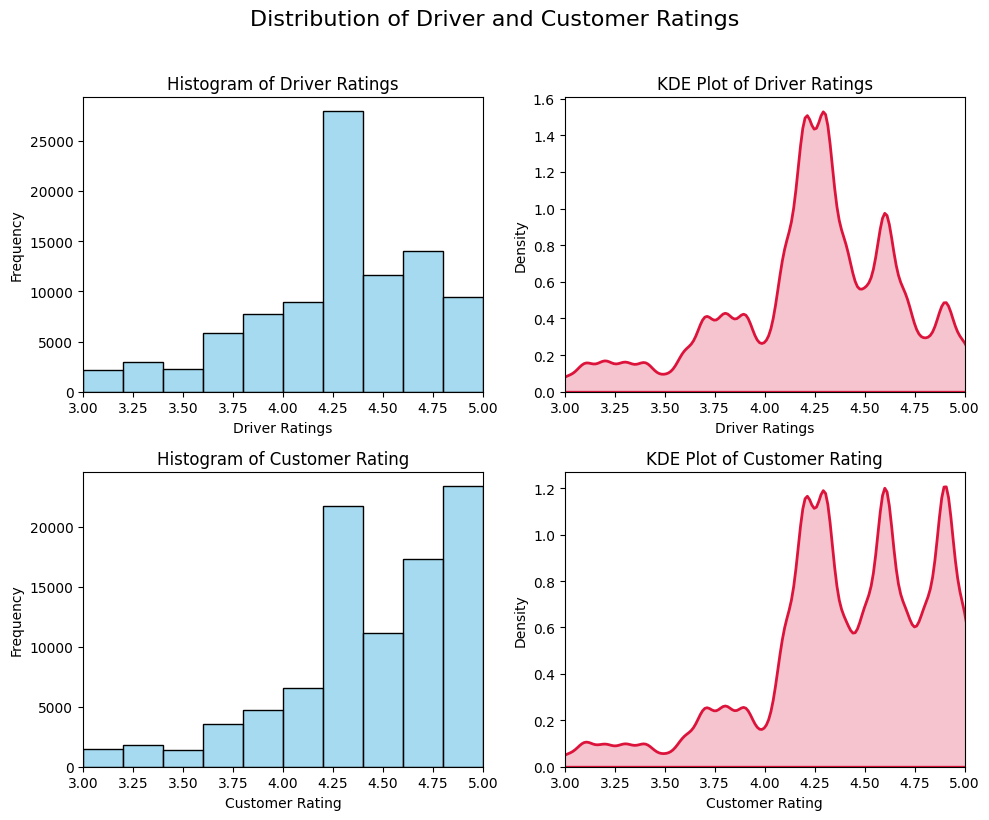

In [ ]:

# Columns for analysis
rating_cols = ['Driver Ratings', 'Customer Rating']#-defines a list of the 2 columns

#Descriptive Statistics(mean,min,max etc)
summary_stats = df_uber[rating_cols].describe()
print(summary_stats)

#Visualization (Histogram and KDE) 
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
plt.suptitle('Distribution of Driver and Customer Ratings', fontsize=16, y=1.02)

for i, col in enumerate(rating_cols):
    
    plot_data = df_uber[col].dropna()

    
    sns.histplot(plot_data, bins=10, kde=False, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Histogram of {col}', fontsize=12)
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].set_xlim(3.0, 5.0)

    
    sns.kdeplot(plot_data, ax=axes[i, 1], color='crimson', linewidth=2, fill=True)
    axes[i, 1].set_title(f'KDE Plot of {col}', fontsize=12)
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel('Density')
    axes[i, 1].set_xlim(3.0, 5.0)

plt.tight_layout()
plt.savefig('rating_distribution_summary.png')

Visual Presentation
Histogram of the driver ratings
-Shows how often each rating range occurs
-Most driver ratings cluster around 4.0-4.5 with the peak close to 4.25-4.5
-Very few ratings fall below 3.5 meaning drivers are generally rated quite positively

KDE plot
-The distribution is heavily skewed toward higher ratings with a strong peak around 4.25-4.5

Histogram of customer rating
-Most ratings fall btwn 4.0-5.0
-Highest frequency is at 4.75-5.0
-Very few customers get rating below 3.5

KDE
-Heavily skewed towards higher values
-Multiple sharp peaks appear btwn 4.25-5.0 showing that drivers often give full or near full scores
-The density below 3.5 is almost flat confirming that low customer ratings are uncommon

Summary
The analysis shows thar both drivers and customers receive high ratings with most ratings concentrated btwn 4.0-5.0. However,
customer ratings are more positively skewed,with the majority clustered >4.5, indicating that drivers tend to rate customers more generously.While both groups arec rated favourably, customers consistently receive higher and less variable ratings compared to drivers

Bivariate Analysis

In [ ]:
#Time of day vs rating


In [ ]:
#Grouping by location-Helps in understanding geographical demand and operational characteristics in the dataset
#Ride volume by pick up location

df_uber.columns = df_uber.columns.str.strip() 
df_uber['Booking ID'] = df_uber['Booking ID'].str.strip('\"')
df_uber['Pickup Location'] = df_uber['Pickup Location'].str.strip()

pickup_volume = df_uber.groupby('Pickup Location')['Booking ID'].count().sort_values(ascending=False).head(10)
print("Top 10 Pickup Locations by Ride Volume (Request Count) ")
print(pickup_volume)

Top 10 Pickup Locations by Ride Volume (Request Count) 
Pickup Location
Khandsa             949
Barakhamba Road     946
Saket               931
Badarpur            921
Pragati Maidan      920
Madipur             919
AIIMS               918
Mehrauli            915
Dwarka Sector 21    914
Pataudi Chowk       907
Name: Booking ID, dtype: int64


In [ ]:
#payment method vs rating
#import the necessary libraries
#load the uploaded file
df_uber=pd.read_csv(r"C:\Users\User\Desktop\pydata\uber dataset.csv")


 Mean Ratings by Payment Method
                Driver Ratings  Customer Rating
Payment Method                                 
Cash                  4.232785         4.405369
Uber Wallet           4.231920         4.408424
Credit Card           4.231620         4.408058
UPI                   4.230351         4.402137
Debit Card            4.226893         4.405753
nan                        NaN              NaN


C:\Users\User\AppData\Local\Temp\ipykernel_9648\2255399934.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_rating_mean.index, y=payment_rating_mean['Driver Ratings'], ax=axes[0], palette='viridis')
C:\Users\User\AppData\Local\Temp\ipykernel_9648\2255399934.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_rating_mean.index, y=payment_rating_mean['Customer Rating'], ax=axes[1], palette='plasma')


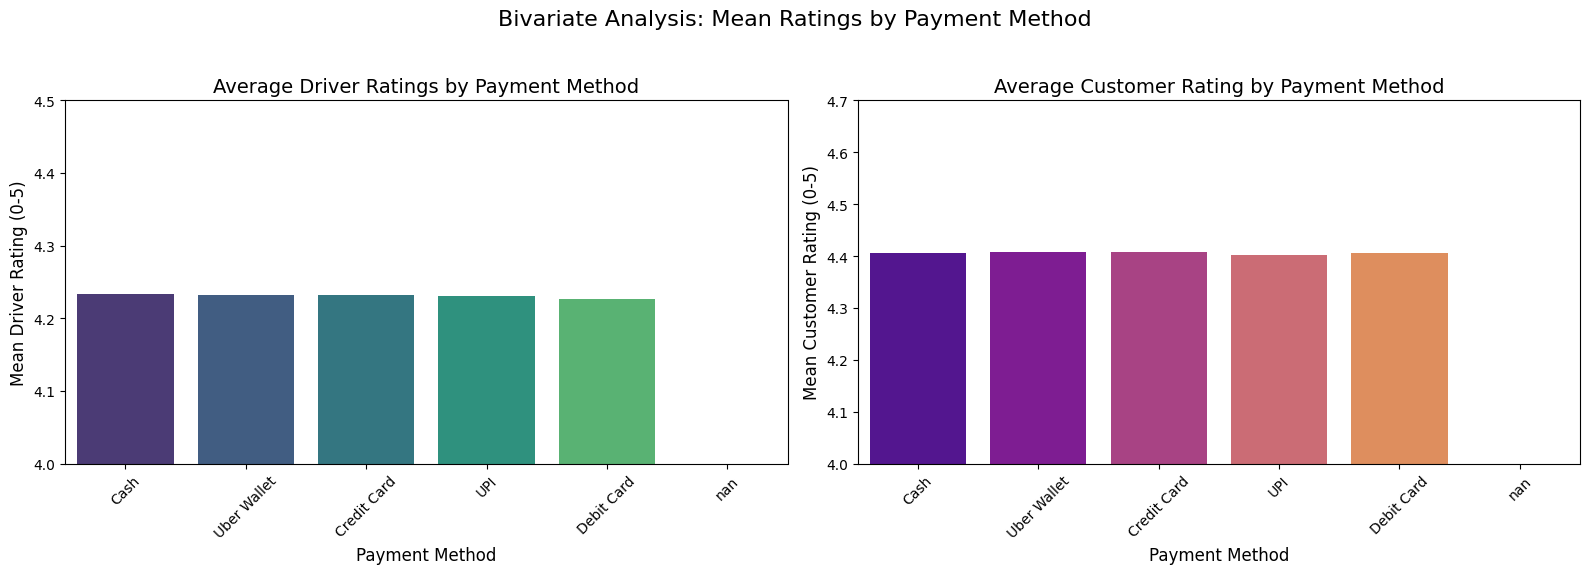

In [29]:
#Define the rating columns
rating_cols = ['Driver Ratings', 'Customer Rating']

# Grouping and Aggregation
# Calculate the mean rating for each payment method and sort by Driver Ratings
payment_rating_mean = df_uber.groupby('Payment Method')[rating_cols].mean().sort_values(by='Driver Ratings', ascending=False)
print(" Mean Ratings by Payment Method")
print(payment_rating_mean)

# Visualization (Bar Plots) 
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plt.suptitle('Bivariate Analysis: Mean Ratings by Payment Method', fontsize=16)

# Plot 1: Driver Ratings vs. Payment Method
sns.barplot(x=payment_rating_mean.index, y=payment_rating_mean['Driver Ratings'], ax=axes[0], palette='viridis')
axes[0].set_title('Average Driver Ratings by Payment Method', fontsize=14)
axes[0].set_xlabel('Payment Method', fontsize=12)
axes[0].set_ylabel('Mean Driver Rating (0-5)', fontsize=12)
axes[0].set_ylim(4.0, 4.5)
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Customer Rating vs. Payment Method
sns.barplot(x=payment_rating_mean.index, y=payment_rating_mean['Customer Rating'], ax=axes[1], palette='plasma')
axes[1].set_title('Average Customer Rating by Payment Method', fontsize=14)
axes[1].set_xlabel('Payment Method', fontsize=12)
axes[1].set_ylabel('Mean Customer Rating (0-5)', fontsize=12)
axes[1].set_ylim(4.0, 4.7) 
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('payment_method_vs_rating_analysis')

Overall Consistency
-The differences in mean ratings between payment methods are extremely small (in the third or fourth decimal place), suggesting that the method of payment has no practical effect on the average rating given or received.
Highest Rated
-The Cash payment method saw the highest mean Driver Rating, while Uber Wallet saw the highest mean Customer Rating.
Lowest Rated 
-Debit Card users, on average, gave the lowest Driver Ratings.
The plots above visualize these minute differences, demonstrating the overall stability of ratings regardless of the payment type.
